In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

data = pd.read_csv('flights.csv')

# просмотрим базовую информацию о датасете
data.info()

## Вывод:
# В датасете 17 строковых столбцов, 12 столбцов типа float, 1 столбец типа int
# В датасете содержится 395 строк (записей)
# Часть данных отсутсвует

## Вспомогательные функции

def values_inside_iqr_for(series):
    median = series.median()
    print('Медиана ' + series.name + ' = ' + str(median))
    iqr = series.quantile(0.75) - series.quantile(0.25)
    print('IQR ' + series.name + ' = ' + str(iqr))
    # внезапно читая чат в слаке я осознал что в учебнике была ошибка,
    # и для определения нижней и верхней границ выбросов нужно было отнимать
    # 1.5 межквартильных расстояния не от медианы, а от нижнего/верхнего квартиля
    # (хотя это разбиралось в разделе о статистике, но как я указывал в комментариях к модулю
    # он так сильно потерялся за остальными необязательными модулями, что определение и его смысл
    # конечно остались в памяти, но подвоха в реализации даже не заметил)
    # я сделал выводы. Но переделывать полностью проект уже поздно :(
    # К тому же, в этом случае даже ученики 21 года не попадают под определение выбросов
    # поэтому позволю себе оставить как есть.
    # P.S. Впредь обязуюсь быть внимательнее и проверять всю инфу из учебника :)
    lower_bound = median - (1.5 * iqr)
    upper_bound = median + (1.5 * iqr)
    print('Нижняя граница выброса ' + series.name + ' = ' + str(lower_bound))
    print('Верхняя граница выброса ' + series.name + ' = ' + str(upper_bound))
    return series.between(lower_bound, upper_bound)
    
def display_normalized_values_for(series):
    print(data[series.name].value_counts(dropna=False, normalize=True).head(10))
    
def display_absent_values_for(series):
    display(data.loc[data[series.name].isna()])
    
def replace_yes_no_with_integers_in(series):
    data[series.name] = data[series.name].apply(lambda x: None if x == None else 1 if x == 'yes' else 0)
    
def replace_empty_string_values_in(series):
    series.apply(lambda x: None if x.strip() == '' else x.strip())
    
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_id        118 non-null    int64  
 1   arrival_airport  118 non-null    object 
 2   model            118 non-null    object 
 3   duration         118 non-null    object 
 4   places_taken     118 non-null    int64  
 5   amount           118 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 5.7+ KB


,flight_id,arrival_airport,model,duration,places_taken,amount
0,136119,SVO,Boeing 737-300,0 years 0 mons 0 days 1 hours 41 mins 0.00 secs,113,6865300.0
1,136120,SVO,Boeing 737-300,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,109,5434800.0
2,136122,SVO,Boeing 737-300,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,97,5411400.0
3,136130,SVO,Boeing 737-300,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,107,5795200.0
4,136131,SVO,Boeing 737-300,0 years 0 mons 0 days 1 hours 39 mins 0.00 secs,124,7111900.0
...,...,...,...,...,...,...
113,136936,EGO,Sukhoi Superjet-100,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,82,3468500.0
114,136937,EGO,Sukhoi Superjet-100,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,81,3572300.0
115,136951,EGO,Sukhoi Superjet-100,0 years 0 mons 0 days 0 hours 49 mins 0.00 secs,90,4527100.0
116,136953,EGO,Sukhoi Superjet-100,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,97,4719200.0


In [5]:
## Разберем основные числовые столбцы

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Медиана age = 17.0
IQR age = 2.0
Нижняя граница выброса age = 13.0
Верхняя граница выброса age = 21.0


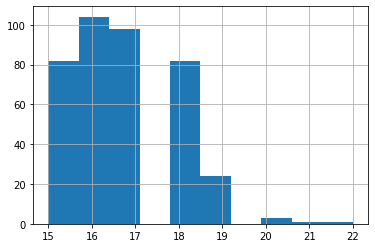

In [6]:
# age
print(data.age.value_counts())
data.age.hist()
print(data.age.describe())

# видим что есть ученики старше 20 лет, сложно представить школьника старше 20 лет, к тому же
# таковые значения являются выбросами, следовательно отбросим их
data = data.loc[values_inside_iqr_for(data.age)]

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: m_education, dtype: int64
count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_education, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


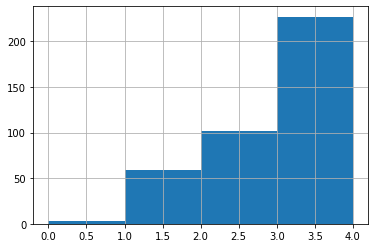

In [7]:
# m_education
print(data.m_education.value_counts())
data.m_education.hist(bins=4)
print(data.m_education.describe())
#видим что большинство матерей имеют высшее либо среднее-специальное образование, часть данных отсутсвует
#рассмотрим отсутствующие данные
display_absent_values_for(data.m_education)

#строка с индексом 239 содержит большое количество пропусков (m/f_education, internet, romantic)
#к тому же значение score = 0. Отбросим ее
data = data.drop(index=239)

#в остальных случаях заменим пропуски на образование, соответствующее образованию отца
data.m_education = np.where(data.m_education.isna(), data['f_education'], data['m_education'])

# видим что матерей без образования всего 3, и можно было бы исключить их из общего списка,
# поскольку данных мало для объективного анализа, однако мне интересно посмотреть какие
# результаты будут в конечном итоге

2.0     105
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: f_education, dtype: int64


count    369.000000
mean       2.620596
std        2.232957
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: f_education, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,-3.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,-6.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,-6.0,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


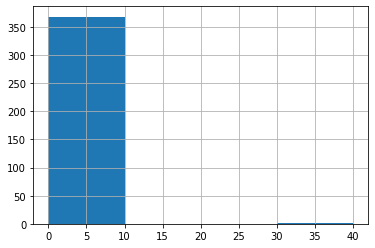

In [8]:
# f_education
print(data.f_education.value_counts())
display(data.f_education.hist(bins=4))
print(data.f_education.describe())
# Видим в этом столбце выброс в виде значения 40. 
# предположим что это ошибочное значение, правильное значение должно быть 4 (высшее образование)
data.loc[(data['f_education'] == 40), 'f_education'] = 4

#рассмотрим отсутсвующие данные
display_absent_values_for(data.f_education)

#для отсутствующих значений используем тот же прием, что и с образованием матери
#т.e. предположим что образование отца соответствует образованию матери
data.f_education = np.where(data.f_education.isna(), data['m_education'], data['f_education'])

# аналогично с матерями, отцов без образования всего 2 и следовало бы их исключить из списка
# поскольку данных мало для объективного анализа, однако так же оставим их, чтобы увидеть результаты
# (хоть мы и знаем что вряд ли их можно будет назвать объективными)

1.0    240
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
1.0    0.610687
2.0    0.244275
NaN    0.071247
3.0    0.055980
4.0    0.017812
Name: traveltime, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,-12.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,-3.0,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


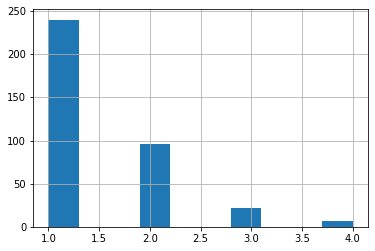

In [9]:
# traveltime
print(data.traveltime.value_counts())
data.traveltime.hist()
display_normalized_values_for(data.traveltime)

# видим что часть данных отсутсвует, рассмотрим отстутвующие данные
display_absent_values_for(data.traveltime)

# заменим отсутсвующие данные в зависимости от типа места жительства
# очевидно, что живущие в городе тратят меньше времени на путь в школу, чем живущие в деревне
# найдем медианные значения для каждого из типов места жительства, и заменим отсутсвующие значения
data.groupby(by=['address'])['traveltime'].median()

# видим что для деревни traveltime составляет 2, для города 1
# если тип адреса так же неизвестен, то опустим такую строку
data = data.dropna(subset=['address', 'traveltime'], how='all')
data.loc[(data['address'] == 'U') & (data['traveltime'].isna()), 'traveltime'] = 1
data.loc[(data['address'] == 'R') & (data['traveltime'].isna()), 'traveltime'] = 2

# видим что 2% (7) учеников тратят очень много времени на путь до школы. посмотрим какие результаты они в итоге покажут

2.0    192
1.0    102
3.0     62
4.0     27
Name: studytime, dtype: int64
count    383.000000
mean       2.036554
std        0.843032
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,studytime_granular,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,1.0,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


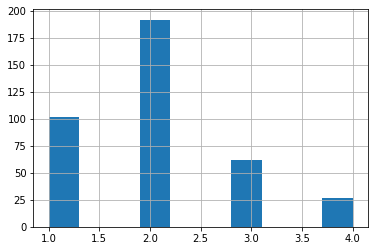

In [10]:
# studytime
print(data.studytime.value_counts())
print(data.studytime.describe())
data.studytime.hist()
# видим что подавляющее большинство учеников занимаются дополнительно 2-5 часов (2)
# часть данных отсутсвует. рассмотрим отсутсвующие данные

display_absent_values_for(data.studytime)

# считаю что данные о дополнитльном обучении достаточно важная информация, 
# которая оказывает существенное влияние на итоговый результат, поэтому замена
# отсутсвующих данных может существенно исказать результат,
# в связи с этим отбросим записи с отсутсвующими данными,
# к тому же, в каждой из данных строк отсутсвует большое количество информации и 
# по остальным признакам
data = data.dropna(subset=['studytime'], how='all')

0.0    286
1.0     47
2.0     15
3.0     14
Name: failures, dtype: int64
0.0    0.746736
1.0    0.122715
NaN    0.054830
2.0    0.039164
3.0    0.036554
Name: failures, dtype: float64


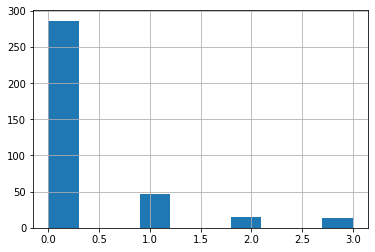

In [11]:
# failures
print(data.failures.value_counts())
data.failures.hist()
display_normalized_values_for(data.failures)

# видим что 75% учеников не испытвали внешкольных неудач. 5% данных отсутсвует
# достаточно сложно интерпретировать данные из этого столбца,
# поэтому предлагаю заменить отсутсвующие данные на значение моды (0)
data.failures = data.failures.fillna(0)

-6.0     0.501305
-3.0     0.266319
-9.0     0.161880
-12.0    0.070496
Name: studytime_granular, dtype: float64


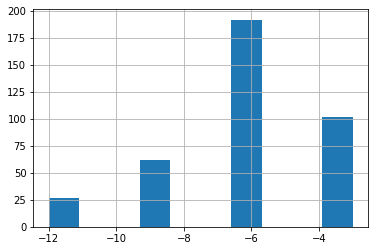

In [12]:
# studytime_granular
data.studytime_granular.hist()
display_normalized_values_for(data.studytime_granular)

# если я правильно понимаю, то этот столбец содержит значение часов из столбцa studytime
# мы уже обработали столбец studytime, по сути эти данные просто дублируются
# (к тому же, почему-то со значением -), поэтому удалим этот столбец

data.drop(['studytime_granular'], inplace=True, axis=1)

count    357.000000
mean       3.932773
std        0.927705
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: family_relations, dtype: float64
 4.0    0.469974
 5.0    0.245431
 3.0    0.151436
 NaN    0.067885
 2.0    0.044386
 1.0    0.018277
-1.0    0.002611
Name: family_relations, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0


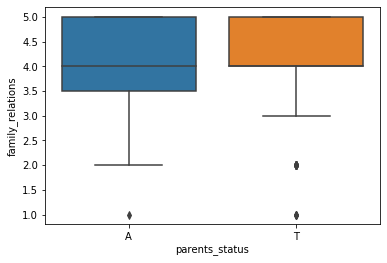

In [13]:
# family_relations
print(data.family_relations.describe())
display_normalized_values_for(data.family_relations)

# видим отрицательное значение -1, предположим что значение должно быть положительным и исправим это
data.loc[(data['family_relations'] == -1), 'family_relations'] = 1

# видим что отсутсвует около 7% данных, что довольно много, рассмотрим их
display_absent_values_for(data.family_relations)

# предлагаю удалить строки, в которых нет данных о семейных отношениях
# и семейной помощи в обучении (family_support), поскольку это достаточно важная информация
# которая оказывает существенное влияние
data = data.dropna(subset=['family_relations', 'family_support'], how='all')

# рассмотрим зависимость семейных отношений и совместного/раздельного проживания родителей
sns.boxplot(x ='parents_status', y = 'family_relations', data = data)

# очевидно, что в семьях где родители живут раздельно, отношения чуть хуже
# однако медианное значение для таких семей = 4.
# поэтому предлагаю заменить отсутсвующие значения в family_relations
# в семьях где родители живут вместе на 5, а где раздельно - на 4
data.loc[(data['parents_status'] == 'A') & (data['family_relations'].isna()), 'family_relations'] = 4
data.loc[(data['parents_status'] == 'T') & (data['family_relations'].isna()), 'family_relations'] = 5

3.0    149
4.0    108
2.0     63
5.0     35
1.0     16
Name: freetime, dtype: int64
3.0    0.391076
4.0    0.283465
2.0    0.165354
5.0    0.091864
1.0    0.041995
NaN    0.026247
Name: freetime, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
280,GP,M,17,U,NaN,A,4.0,4.0,services,other,home,mother,2.0,1.0,0.0,no,no,yes,yes,yes,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
290,GP,M,18,U,GT3,T,4.0,4.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,5.0,NaN,2.0,5.0,11.0,55.0
291,GP,F,17,U,GT3,T,4.0,3.0,NaN,services,reputation,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,NaN,2.0,3.0,0.0,75.0
311,GP,F,19,U,GT3,T,2.0,1.0,at_home,other,other,other,3.0,2.0,0.0,no,yes,no,no,yes,no,yes,yes,3.0,NaN,1.0,2.0,20.0,65.0
338,GP,F,18,U,LE3,T,3.0,3.0,services,services,home,mother,1.0,4.0,0.0,no,yes,no,no,yes,yes,yes,no,5.0,NaN,3.0,1.0,7.0,85.0


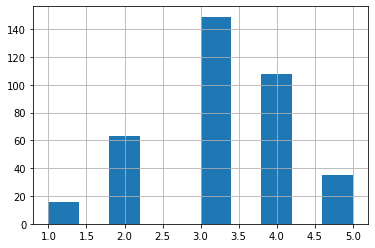

In [14]:
# freetime
print(data.freetime.value_counts())
data.freetime.hist()
display_normalized_values_for(data.freetime)

# видим что отсутствует небольшая часть значений (2.5%), рассмотрим их
display_absent_values_for(data.freetime)

# полагаю что будет логичным заменить отсутсвующие значения в данном случае
# на значения из столбца go_out. поскольку очевидно что если ты проводишь много времени с друзьями
# то у тебя много свободного времени, и наоборот :)
data.freetime = np.where(data.freetime.isna(), data['go_out'], data['freetime'])

3.0    124
2.0     97
4.0     82
5.0     49
1.0     22
Name: go_out, dtype: int64
3.0    0.325459
2.0    0.254593
4.0    0.215223
5.0    0.128609
1.0    0.057743
NaN    0.018373
Name: go_out, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
89,GP,M,16,U,LE3,A,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,no,no,4.0,1.0,NaN,5.0,18.0,35.0
92,GP,F,16,NaN,LE3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
200,GP,F,16,U,GT3,T,4.0,3.0,health,other,home,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,NaN,2.0,2.0,80.0
202,GP,F,17,U,NaN,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
221,GP,F,17,U,NaN,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
322,GP,F,17,R,LE3,T,2.0,2.0,services,services,course,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,no,3.0,3.0,NaN,3.0,3.0,55.0


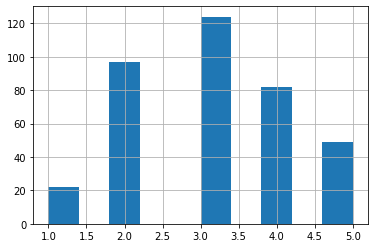

In [15]:
# go_out
print(data.go_out.value_counts())
data.go_out.hist()
display_normalized_values_for(data.go_out)

# видим что отсутствует небольшая часть значений (1.8%), рассмотрим их
display_absent_values_for(data.go_out)

# поступим аналогично предыдущему случаю, и подставим вместо отсутсвующих значений
# значения из столбца freetime
data.go_out = np.where(data.go_out.isna(), data['freetime'], data['go_out'])

count    367.000000
mean       3.536785
std        1.397943
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
5.0    0.354331
3.0    0.225722
4.0    0.154856
1.0    0.118110
2.0    0.110236
NaN    0.036745
Name: health, dtype: float64


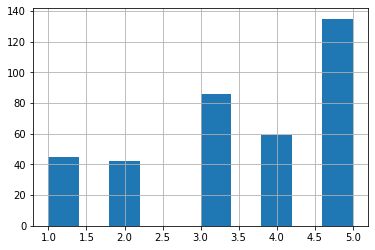

In [16]:
# health
print(data.health.describe())
display_normalized_values_for(data.health)
data.health.hist()

# видим что бОльшая часть студентов чувствуют себя замечательно
# и можем лишь посочувствовать 22% у которых не все хорошо со здоровьем
# пока нет понимания как можно заменить отсутсвующие значения,
# возможно следовало бы удалить строки с отсутвующими данными по здоровью,
# поскольку это весьма важный фактор, который нельзя не учитывать,
# однако пока предлагаю оставить как есть, возможно в дальнейшем мы как-либо обработаем эти данные

count    371.000000
mean       7.161725
std       23.560405
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
0.0     0.283465
2.0     0.152231
4.0     0.133858
6.0     0.078740
8.0     0.052493
10.0    0.044619
12.0    0.031496
14.0    0.028871
NaN     0.026247
3.0     0.020997
Name: absences, dtype: float64
Медиана absences = 4.0
IQR absences = 8.0
Нижняя граница выброса absences = -12.0
Верхняя граница выброса absences = 20.0


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score


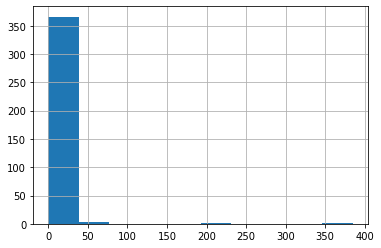

In [17]:
# absences
print(data.absences.describe())
display_normalized_values_for(data.absences)
data.absences.hist()

# очевидны проблемы с этим столбцом, сразу же явно видны выбросы
# (ну либо они просто перестали ходить в школу :) )
# поэтому избавимся от выбросов
data = data.loc[values_inside_iqr_for(data.absences)]

display_absent_values_for(data.absences)

#отсутвующих значений нет

count    350.000000
mean      51.842857
std       22.957314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
50.0    0.143662
55.0    0.115493
0.0     0.098592
75.0    0.081690
65.0    0.078873
60.0    0.078873
70.0    0.076056
40.0    0.070423
45.0    0.064789
80.0    0.045070
Name: score, dtype: float64
Медиана score = 55.0
IQR score = 30.0
Нижняя граница выброса score = -5.0
Верхняя граница выброса score = 115.0


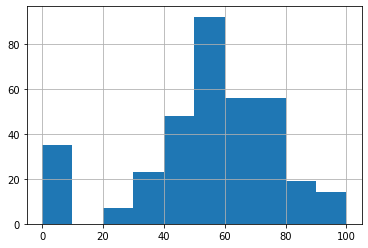

In [18]:
# score
print(data.score.describe())
display_normalized_values_for(data.score)
data.score.hist()

# явно видно нормальное распределение оценок, при этом имеются
# выбросы/отсутсвующие данные в виде оценок 0, избавимся от них
data = data.loc[values_inside_iqr_for(data.score)]

# в результате этого мы так же избавились от результата 100
# (верхняя граница 98.125), но предлагаю не рассматривать вундеркиндов,
# а исследовать обычных студентов/школьников :)

In [19]:
## подведем итоги обработки числовых столбцов
data.info()

# видим что в результате обработки всех числовых столбцов мы исключили ряд записей
# по разным причинам. Осталось 302 записи

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 394
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            350 non-null    object 
 1   sex               350 non-null    object 
 2   age               350 non-null    int64  
 3   address           339 non-null    object 
 4   family_size       329 non-null    object 
 5   parents_status    315 non-null    object 
 6   m_education       350 non-null    float64
 7   f_education       350 non-null    float64
 8   m_job             334 non-null    object 
 9   f_job             318 non-null    object 
 10  reason            334 non-null    object 
 11  guardian          320 non-null    object 
 12  traveltime        350 non-null    float64
 13  studytime         350 non-null    float64
 14  failures          350 non-null    float64
 15  school_support    341 non-null    object 
 16  family_support    318 non-null    object 
 1

In [20]:
## Обработка строковых столбцов

In [21]:
# school
display(data.school.value_counts())
display_normalized_values_for(data.school)

# видим, что 88% учеников обучаются в школе GP (что бы это ни значило). отсутсвующих/пустых значений нет


GP    308
MS     42
Name: school, dtype: int64

GP    0.88
MS    0.12
Name: school, dtype: float64


In [22]:
# sex

display(data.sex.value_counts())
display_normalized_values_for(data.sex)

# видим что соотношение мальчиков и девочек примерно равное. отсутсвующих/пустых значений нет

F    181
M    169
Name: sex, dtype: int64

F    0.517143
M    0.482857
Name: sex, dtype: float64


In [23]:
# address
display(data.address.value_counts())
display_normalized_values_for(data.address)

# видим что соотношение городских учеников к сельским примерно 3 к 1. Есть 3% пропущенных значений. 
# часть пропусков нами уже была обработана при анализе столбцa traveltime.
# рассмотрим оставшиеся пропуски

display_absent_values_for(data.address)

# для обработки пропусков в данном столбце используем тот же прием, что и при заполнении пропусков
# в столбце traveltime (1 - для городского жителя, 2 - для сельского)
data.loc[(data['traveltime'] == 1) & (data['address'].isna()), 'address'] = 'U'
data.loc[(data['traveltime'] == 2) & (data['address'].isna()), 'address'] = 'R'

U    261
R     78
Name: address, dtype: int64

U      0.745714
R      0.222857
NaN    0.031429
Name: address, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,5.0,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,1.0,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,3.0,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,3.0,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0
354,MS,M,17,NaN,GT3,T,4.0,3.0,services,other,home,mother,2.0,2.0,0.0,no,yes,yes,yes,no,yes,yes,yes,4.0,5.0,5.0,2.0,4.0,55.0
359,MS,F,18,NaN,LE3,T,1.0,1.0,at_home,services,course,father,2.0,3.0,0.0,no,no,no,no,NaN,yes,yes,no,5.0,3.0,2.0,4.0,0.0,80.0


In [24]:
# family size
display(data.family_size.value_counts())
display_normalized_values_for(data.family_size)

# видим что 65% учеников проживают в больших семьях. 5% данных отсутсвуют
# рассмотрим оставшиеся пропуски

display_absent_values_for(data.family_size)

# учитывая что большинство учеников из больших семей, предлагаю заменить отсутсвующие значения 
# на GT3, если родители живут вместе (parents_status == T), и на LE3, если раздельно
# если данные о родителях так же отсутсвуют - удалим такие строки
data = data.dropna(subset=['parents_status', 'family_size'], how='all')
data.loc[(data['parents_status'] == 'A') & (data['family_size'].isna()), 'family_size'] = 'LE3'
data.loc[(data['parents_status'] == 'T') & (data['family_size'].isna()), 'family_size'] = 'GT3'

GT3    231
LE3     98
Name: family_size, dtype: int64

GT3    0.66
LE3    0.28
NaN    0.06
Name: family_size, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,0.0,no,no,no,yes,yes,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
167,GP,F,16,U,NaN,T,4.0,2.0,health,services,home,father,1.0,2.0,0.0,no,NaN,yes,no,yes,yes,yes,yes,4.0,2.0,3.0,3.0,0.0,80.0


T    284
A     31
Name: parents_status, dtype: int64

T      0.818444
NaN    0.092219
A      0.089337
Name: parents_status, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
11,GP,F,15,U,GT3,NaN,2.0,4.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,1.0,2.0,2.0,5.0,14.0,40.0
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,0.0,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,3.0,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
96,GP,M,16,R,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0


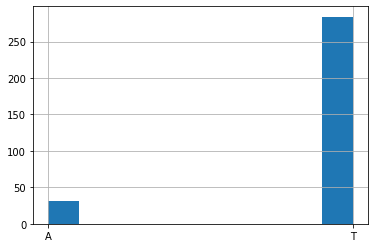

In [25]:
# parents_status
display(data.parents_status.value_counts())
display_normalized_values_for(data.parents_status)
data.parents_status.hist()

# видим что в 80% случаев родители живут вместе. 9% данных отсутсвует, 9% живут раздельно
# рассмотрим оставшиеся пропуски

display_absent_values_for(data.parents_status)

# можно было бы следовать логике, обратной логике с размером семьи, но поскольку
# подавляющее большинство родителей живут вместе, заменим пропуски на значение моды
data.parents_status = data.parents_status.fillna(data.parents_status.mode()[0])

other       114
services     83
at_home      53
teacher      51
health       31
Name: m_job, dtype: int64
other       0.328530
services    0.239193
at_home     0.152738
teacher     0.146974
health      0.089337
NaN         0.043228
Name: m_job, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,T,3.0,3.0,NaN,other,other,mother,1.0,1.0,0.0,no,no,yes,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,GT3,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,T,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


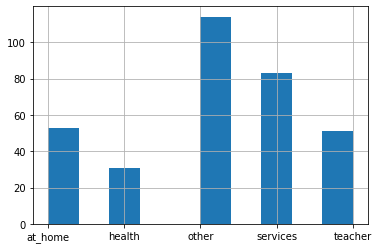

In [26]:
# m_job
print(data.m_job.value_counts())
display_normalized_values_for(data.m_job)
display(data.m_job.hist())

# видим что 4% информации отсутсвует, рассмотрим отсутвующие данные
display_absent_values_for(data.m_job)

# думаю, наиболее правильным вариантом в данном случае будет заменить пропуски в работе матери
# на работу отца. не думаю, что эти значения окажут какое-то сильное влияние на конечный результат.
# в случае отсутсвия обоих данных - удалим такие строки
data = data.dropna(subset=['m_job', 'f_job'], how='all')
data.m_job = np.where(data.m_job.isna(), data['f_job'], data['m_job'])

other       0.508671
services    0.248555
NaN         0.089595
teacher     0.072254
at_home     0.043353
health      0.037572
Name: f_job, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,1.0,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,R,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,2.0,2.0,0.0,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
107,GP,M,16,U,GT3,T,3.0,3.0,services,NaN,home,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,2.0,90.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,5.0,2.0,4.0,5.0,20.0,40.0


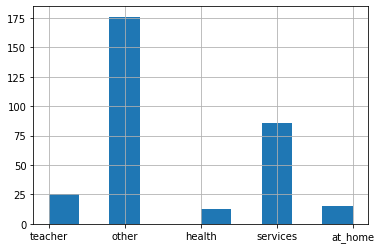

In [27]:
# f_job
display_normalized_values_for(data.f_job)
display(data.f_job.hist())

# видим что 8% информации отсутсвует, рассмотрим отсутвующие данные
display_absent_values_for(data.f_job)

# у меня появилась другая идея, привязать работу родителя к его уровню образования.
# оставим замену для работы матери как есть, поскольку там пропущенных значений в 2 раза меньше
# чем для работы отца, а для работы отца применим подход где
# уровень образования 4 - health, 3 - teacher, 2 - services, 1 - at_home

values_dictionary = {
    4: 'health',
    3: 'teacher',
    2: 'services',
    1: 'at_home'
}
for key, value in values_dictionary.items():
    data.loc[(data['f_education'] == key) & (data['f_job'].isna()), 'f_job'] = value

In [28]:
# reason
display(data.reason.value_counts())
display_normalized_values_for(data.reason)

# видим что 4% информации отсутсвует, рассмотрим отсутвующие данные
display_absent_values_for(data.reason)

# сложно делать какие-либо выводы об этом столбце, да и не думаю что он имеет отношение
# к оценкам. возможно имеет отношение пункт 'course', то есть образовательная программа,
# но это не значит что в других школах она хуже, просто кто-то руководствуется
# другими причинами при выборе школы. 
# позволю себе удалить данный столбец как нерелевантный
data.drop(['reason'], inplace=True, axis=1)

course        124
home           89
reputation     88
other          29
Name: reason, dtype: int64

course        0.358382
home          0.257225
reputation    0.254335
other         0.083815
NaN           0.046243
Name: reason, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
63,GP,F,16,U,GT3,T,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,5.0,3.0,2.0,5.0,2.0,70.0
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0
137,GP,F,16,U,GT3,A,3.0,3.0,other,other,NaN,other,1.0,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0
186,GP,M,16,U,GT3,T,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0


In [29]:
# guardian
display(data.guardian.value_counts())
display_normalized_values_for(data.guardian)

# данный столбец мне не совсем понятен. что значит опекун мать/отец
# если семья полная, то очевидно что оба родителя выполняют свои функции, а не кто-то один
# однако все же рассмотрим отсутсвующие значения, возможно найдем способ для замены данных
display_absent_values_for(data.guardian)

# сложно предположить какие-либо варианты для замены. удалим этот столбец
data.drop(['guardian'], inplace=True, axis=1)

mother    216
father     80
other      20
Name: guardian, dtype: int64

mother    0.624277
father    0.231214
NaN       0.086705
other     0.057803
Name: guardian, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,guardian,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,NaN,1.0,1.0,0.0,no,yes,no,no,no,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
81,GP,M,15,U,GT3,T,2.0,3.0,other,other,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,1.0,2.0,1.0,no,no,no,no,yes,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,NaN,1.0,1.0,3.0,no,yes,no,no,yes,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0


no     294
yes     43
Name: school_support, dtype: int64

no     0.849711
yes    0.124277
NaN    0.026012
Name: school_support, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,1.0,1.0,0.0,NaN,no,yes,no,yes,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,1.0,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
79,GP,F,16,U,GT3,T,3.0,4.0,at_home,other,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,at_home,1.0,1.0,1.0,NaN,no,no,yes,yes,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,1.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,2.0,2.0,0.0,NaN,yes,yes,no,yes,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,1.0,1.0,0.0,NaN,no,no,no,yes,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0


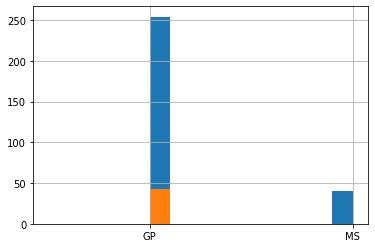

In [30]:
# school_support
display(data.school_support.value_counts())
display_normalized_values_for(data.school_support)

#видим что в большинстве случаев дополнительной поддержки нет. при этом небольшая часть данных (2.5%) пропущена
# рассмотрим отсутсвующие данные

display_absent_values_for(data.school_support)

#  возможно, наличие поддержки связано с типом школы. проверим эту гипотезу
data.groupby(by=['school_support'])['school'].hist()

# видим что поддержка есть только в школе GP, однако в связи с малочисленностью 
# данных о наличии поддержки мы не можем однозначно сказать что все остальные данные можно 
# заменить на наличие поддержки. Поскольку в школе MS данных о поддержке нет
# то в ней мы заменим отсутвующее значение на 'no'
data.loc[(data['school'] == 'MS') & (data['school_support'].isna()), 'school_support'] = 'no'

# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.school_support)

In [31]:
# family_support
display(data.family_support.value_counts())
display_normalized_values_for(data.family_support)

# видим что в отличие от школьной поддержки, более половины учеников занимаются в семье
# 8% данных пропущено, рассмотрим их
display_absent_values_for(data.family_support)

# на данный момент не представляется возможным как-либо заполнить пропуски

# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.family_support)

yes    199
no     117
Name: family_support, dtype: int64

yes    0.575145
no     0.338150
NaN    0.086705
Name: family_support, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,services,1.0,2.0,0.0,0,NaN,no,yes,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
28,GP,M,16,U,LE3,T,3.0,4.0,services,other,1.0,2.0,0.0,1,NaN,no,yes,yes,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,1.0,2.0,0.0,0,NaN,no,yes,no,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,1.0,3.0,0.0,1,NaN,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,1.0,2.0,0.0,0,NaN,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
52,GP,M,15,R,LE3,A,4.0,2.0,health,services,2.0,1.0,1.0,0,NaN,no,no,yes,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
61,GP,F,16,U,GT3,T,1.0,1.0,services,services,4.0,1.0,0.0,1,NaN,no,yes,no,yes,yes,yes,5.0,5.0,5.0,5.0,6.0,55.0
78,GP,M,17,U,GT3,T,2.0,1.0,other,other,2.0,1.0,3.0,1,NaN,no,yes,yes,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,1.0,1.0,0.0,0,NaN,no,yes,no,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,1.0,2.0,3.0,0,NaN,no,no,no,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0


In [32]:
# paid
display(data.paid.value_counts())
display_normalized_values_for(data.paid)

# видим что распределение учеников с платными занятиями и без них приблизительно равное, при этом 11% данных пропущено
display_absent_values_for(data.paid)

# на данный момент не представляется возможным как-либо заполнить пропуски
# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.paid)

no     177
yes    132
Name: paid, dtype: int64

no     0.511561
yes    0.381503
NaN    0.106936
Name: paid, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,1.0,2.0,3.0,1,0,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,1.0,1.0,3.0,0,1,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
19,GP,M,16,U,LE3,T,4.0,3.0,health,other,1.0,1.0,0.0,0,0,NaN,yes,yes,yes,yes,no,3.0,1.0,3.0,5.0,4.0,50.0
21,GP,M,15,U,GT3,T,4.0,4.0,health,health,1.0,1.0,0.0,0,1,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,services,1.0,1.0,0.0,0,1,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,health,2.0,2.0,0.0,0,1,NaN,yes,yes,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
51,GP,F,15,U,LE3,T,4.0,2.0,health,other,1.0,2.0,0.0,0,0,NaN,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,2.0,65.0
57,GP,M,15,U,GT3,T,4.0,4.0,teacher,health,1.0,2.0,0.0,0,1,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,services,2.0,2.0,0.0,1,1,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
81,GP,M,15,U,GT3,T,2.0,3.0,other,other,1.0,3.0,0.0,1,0,NaN,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0


In [33]:
# activities
display(data.activities.value_counts())
display_normalized_values_for(data.activities)

# видим что распределение учеников с доп занятиями и без них приблизительно равное, при этом 4% данных пропущено
display_absent_values_for(data.activities)

# на данный момент не представляется возможным как-либо заполнить пропуски
# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.activities)

yes    173
no     159
Name: activities, dtype: int64

yes    0.500000
no     0.459538
NaN    0.040462
Name: activities, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,1.0,1.0,0.0,1,1,0,NaN,yes,yes,yes,no,5.0,4.0,1.0,1.0,0.0,55.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,services,2.0,2.0,1.0,1,0,0,NaN,yes,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
54,GP,F,15,U,LE3,T,3.0,3.0,other,other,1.0,1.0,0.0,0,0,1,NaN,yes,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
81,GP,M,15,U,GT3,T,2.0,3.0,other,other,1.0,3.0,0.0,1,0,0,NaN,no,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,1.0,3.0,0.0,1,1,1,NaN,yes,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
116,GP,M,15,U,GT3,T,4.0,4.0,other,teacher,2.0,2.0,0.0,0,1,0,NaN,yes,yes,no,no,4.0,4.0,3.0,2.0,2.0,70.0
126,GP,F,15,U,LE3,A,3.0,4.0,other,other,1.0,2.0,0.0,1,0,0,NaN,yes,yes,yes,yes,5.0,3.0,2.0,1.0,0.0,55.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,2.0,4.0,0.0,1,1,0,NaN,yes,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,2.0,1.0,2.0,0,1,0,NaN,yes,yes,NaN,no,2.0,3.0,3.0,2.0,8.0,45.0
160,GP,M,17,R,LE3,T,2.0,1.0,at_home,at_home,2.0,1.0,2.0,0,0,0,NaN,yes,no,yes,yes,5.0,3.0,2.0,5.0,0.0,0.0


In [34]:
# nursery
display(data.nursery.value_counts())
display_normalized_values_for(data.nursery)

# видим что 77% посещали детский сад, 4% данных пропущено.
display_absent_values_for(data.nursery)

# на данный момент не представляется возможным как-либо заполнить пропуски
# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.nursery)

yes    263
no      68
Name: nursery, dtype: int64

yes    0.760116
no     0.196532
NaN    0.043353
Name: nursery, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,services,1.0,2.0,0.0,0,0,0,1,NaN,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
32,GP,M,15,R,GT3,T,4.0,3.0,teacher,at_home,1.0,2.0,0.0,0,1,0,1,NaN,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,80.0
85,GP,F,15,U,GT3,T,4.0,4.0,services,services,2.0,2.0,2.0,0,0,1,0,NaN,yes,yes,yes,4.0,4.0,4.0,5.0,6.0,40.0
88,GP,M,16,U,GT3,T,2.0,2.0,other,other,2.0,2.0,1.0,0,0,1,1,NaN,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
152,GP,F,15,R,GT3,T,3.0,3.0,services,teacher,2.0,3.0,2.0,0,1,1,1,NaN,yes,yes,yes,4.0,2.0,1.0,3.0,8.0,50.0
212,GP,F,16,U,GT3,A,2.0,2.0,other,other,1.0,2.0,0.0,1,1,1,0,NaN,yes,yes,no,3.0,3.0,4.0,4.0,0.0,70.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,1.0,1.0,0.0,0,0,1,0,NaN,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,1.0,2.0,0.0,0,1,0,0,NaN,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
332,GP,F,18,U,GT3,T,3.0,3.0,services,services,1.0,2.0,0.0,0,0,0,1,NaN,yes,yes,no,5.0,3.0,4.0,4.0,0.0,0.0
336,GP,F,19,R,GT3,A,3.0,1.0,services,at_home,1.0,3.0,1.0,0,0,1,0,NaN,yes,no,no,5.0,4.0,3.0,5.0,12.0,65.0


In [35]:
# higher
display(data.higher.value_counts())
display_normalized_values_for(data.higher)

# видим что 92% хотят получать высшее образование (что радует). отсутвует 2.5% данных, рассмотрим их
display_absent_values_for(data.higher)

# думаю, при таком подавляющем большинстве желающих получать высшее образование, можно заменить отсутсвующие
# данные на большинство
data.higher = data.higher.fillna('yes')

# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.higher)

yes    315
no      13
Name: higher, dtype: int64

yes    0.910405
NaN    0.052023
no     0.037572
Name: higher, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
34,GP,M,16,U,GT3,T,3.0,2.0,other,other,1.0,1.0,0.0,0,1,1,0,0,NaN,yes,no,5.0,4.0,3.0,5.0,0.0,75.0
48,GP,M,15,U,GT3,T,4.0,2.0,teacher,other,1.0,2.0,0.0,0,1,1,0,1,NaN,no,no,4.0,3.0,3.0,5.0,2.0,70.0
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,2.0,4.0,0.0,0,0,0,1,1,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
84,GP,F,15,U,GT3,T,1.0,1.0,other,other,1.0,2.0,0.0,0,1,0,1,0,NaN,yes,no,4.0,3.0,2.0,4.0,2.0,50.0
96,GP,M,16,R,GT3,T,4.0,3.0,services,other,2.0,1.0,0.0,1,1,0,1,0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
142,GP,F,15,U,GT3,T,4.0,4.0,teacher,services,1.0,3.0,0.0,0,1,1,1,1,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
149,GP,M,15,U,LE3,T,2.0,1.0,services,other,4.0,1.0,3.0,0,0,0,0,1,NaN,yes,no,4.0,5.0,5.0,5.0,0.0,50.0
158,GP,M,16,R,GT3,T,2.0,2.0,at_home,other,3.0,1.0,0.0,0,0,0,0,0,NaN,no,no,4.0,2.0,2.0,3.0,2.0,75.0
170,GP,M,16,U,GT3,T,3.0,4.0,other,other,3.0,1.0,0.0,0,1,0,1,0,NaN,yes,no,3.0,4.0,5.0,2.0,0.0,0.0
171,GP,M,16,U,GT3,T,1.0,0.0,other,other,2.0,2.0,0.0,0,1,1,1,1,NaN,yes,yes,4.0,3.0,2.0,3.0,2.0,80.0


In [36]:
# internet
display(data.internet.value_counts())
display_normalized_values_for(data.internet)

# видим что 76.5% имеют доступ в интернет, 14.7% - нет. отсутвует 8% данных, рассмотрим их
display_absent_values_for(data.internet)

# хотелось бы заполнить все пропуски доступом в интернет, но я не Илон Маск чтобы дарить
# людям бесплатный интернет :)

# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.internet)

yes    263
no      52
Name: internet, dtype: int64

yes    0.760116
no     0.150289
NaN    0.089595
Name: internet, dtype: float64


,school,sex,age,address,family_size,parents_status,m_education,f_education,m_job,f_job,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
0,GP,F,18,U,LE3,A,4.0,4.0,at_home,teacher,2.0,2.0,0.0,1,0,0,0,1,1,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,1.0,1.0,0.0,0,1,1,1,1,1,NaN,no,5.0,3.0,3.0,5.0,2.0,70.0
52,GP,M,15,R,LE3,A,4.0,2.0,health,services,2.0,1.0,1.0,0,0,0,0,1,1,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
65,GP,F,16,U,LE3,T,4.0,3.0,teacher,services,3.0,2.0,0.0,0,1,0,1,1,1,NaN,no,5.0,4.0,3.0,1.0,2.0,75.0
80,GP,M,15,U,GT3,T,2.0,3.0,other,services,1.0,1.0,0.0,1,1,1,1,0,1,NaN,yes,3.0,2.0,2.0,3.0,2.0,60.0
86,GP,F,16,U,LE3,T,2.0,2.0,at_home,other,1.0,2.0,0.0,0,1,0,0,1,1,NaN,no,4.0,3.0,4.0,2.0,4.0,30.0
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,1.0,1.0,0.0,0,0,0,1,0,1,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,1.0,1.0,0.0,0,0,0,1,1,1,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,1.0,2.0,0.0,0,1,0,1,1,1,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
117,GP,M,16,U,GT3,T,3.0,3.0,other,services,2.0,1.0,0.0,0,0,0,1,1,1,NaN,no,5.0,4.0,2.0,5.0,0.0,65.0


In [37]:
# romantic
display(data.romantic.value_counts())
display_normalized_values_for(data.romantic)

# видим что 63% не состоят в отношениях. 8% данных отсутсвует, рассмотрим их

# на данный момент не представляется возможным как-либо заполнить пропуски
# заменим yes/no на 1/0 для учета этих данных в таблице корреляции
replace_yes_no_with_integers_in(data.romantic)

no     215
yes    105
Name: romantic, dtype: int64

no     0.621387
yes    0.303468
NaN    0.075145
Name: romantic, dtype: float64


In [38]:
## данные после обработки всех столбцов 
data.info()

# осталось 298 записей, часть столбцов была удалена

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 394
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school            346 non-null    object 
 1   sex               346 non-null    object 
 2   age               346 non-null    int64  
 3   address           346 non-null    object 
 4   family_size       346 non-null    object 
 5   parents_status    346 non-null    object 
 6   m_education       346 non-null    float64
 7   f_education       346 non-null    float64
 8   m_job             346 non-null    object 
 9   f_job             346 non-null    object 
 10  traveltime        346 non-null    float64
 11  studytime         346 non-null    float64
 12  failures          346 non-null    float64
 13  school_support    346 non-null    int64  
 14  family_support    346 non-null    int64  
 15  paid              346 non-null    int64  
 16  activities        346 non-null    int64  
 1

In [39]:
# рассмотрим таблицу корреляции
data.corr()

# видим что данные довольно слабо коррелируют с переменной score, однако есть ряд примечательных факторов
# мы видим довольно сильную отрицательную корреляцию score и failures, что говорит о том
# что ученики с большим количеством неудач показывают более низкие результаты
# аналогична отрицательная корреляция с параметром absences, что говорит о том, что 
# с ростом количества пропусков занятий оценка снижается.
# такая же ситуация с переменной go_out,
# что так же говорит о том, что ученики которые тратят много времени на прогулки - показывают результаты хуже

# очень высокий отрицательный коээффициент корреляции с переменной school_support для меня несколько непонятен
# возможно мне не следовало заменять yes/no в данном случае на 1/0 и вносить ее в таблицу корреляции.
# при этом, допускаю что я не совсем правильно интерпретирую данную переменную, и она говорит о том
# что данный ученик слабо успевает за школьной программой и получает доп поддержку в школе
# в таком случае отрицательный коэффициент корреляции вполне объясним

# из положительных сильных корреляций явно выделяются уровни образования родителей. 0.17 для матери и 0.11 для отца
# что говорит о том, что чем выше образование родителей, тем выше скорее всего будет результат экзамена.
# так же видна положительная корреляция с параметром studytime, что говорит о том что с ростом времени
# на занятия помимо школы, результат экзамена так же будет выше.

# видим что подавляющее большинство данных слабо коррелирует с переменной score. у меня есть предположение
# отрбосить все параметры, коэффициент корреляции которых по модулю меньше чем 0.05, однако прежде чем это сделать
# проведем анализ номинативных переменных и на основании его сделаем выводы

# так же видна высокая корреляция образования матери/отца, однако допускаю что это может быть связано
# со способом замены пропусков в обоих случаях, хоть и незначительно

,age,m_education,f_education,traveltime,studytime,failures,school_support,family_support,paid,activities,nursery,higher,internet,romantic,family_relations,freetime,go_out,health,absences,score
age,1.000000,-0.161848,-0.151164,0.097509,0.017899,0.129724,-0.237371,-0.123185,-0.009082,-0.028180,-0.094284,-0.136268,-0.121781,0.110657,0.042880,0.024203,0.105783,-0.046021,0.123706,-0.146501
m_education,-0.161848,1.000000,0.658030,-0.178290,0.085850,-0.229435,-0.024314,0.151549,0.094713,0.094255,0.152612,0.161003,0.201664,0.015405,-0.012801,0.021690,0.033745,-0.049984,0.080847,0.210652
f_education,-0.151164,0.658030,1.000000,-0.144655,-0.003625,-0.248791,0.046026,0.167700,0.019856,0.081717,0.122589,0.152845,0.104070,0.001442,-0.011710,0.001258,0.060291,0.025689,0.017233,0.120613
traveltime,0.097509,-0.178290,-0.144655,1.000000,-0.098510,0.086905,-0.011218,-0.054009,-0.042693,-0.016629,-0.024705,-0.137492,-0.063648,0.062147,-0.040180,-0.012573,0.054921,-0.009567,-0.040351,-0.075779
studytime,0.017899,0.085850,-0.003625,-0.098510,1.000000,-0.153610,0.029284,0.116574,0.223961,0.103723,0.063296,0.134405,0.133817,0.049786,0.021496,-0.149953,-0.025008,-0.093986,-0.069293,0.108624
failures,0.129724,-0.229435,-0.248791,0.086905,-0.153610,1.000000,0.046660,-0.058457,-0.160897,-0.029149,-0.119475,-0.203224,-0.070715,0.063009,-0.007127,0.096295,0.061391,0.128941,0.045523,-0.325802
school_support,-0.237371,-0.024314,0.046026,-0.011218,0.029284,0.046660,1.000000,0.057932,-0.025333,-0.008761,0.026980,0.028362,0.006463,-0.019992,0.007166,-0.029847,-0.007867,-0.061932,0.023115,-0.093303
family_support,-0.123185,0.151549,0.167700,-0.054009,0.116574,-0.058457,0.057932,1.000000,0.229666,-0.005847,0.051168,0.076156,0.133321,0.033189,-0.020050,-0.060797,-0.031007,-0.005512,0.045011,-0.039486
paid,-0.009082,0.094713,0.019856,-0.042693,0.223961,-0.160897,-0.025333,0.229666,1.000000,-0.011900,0.051063,0.155178,0.190400,0.076900,-0.030849,-0.083092,0.010026,-0.112242,-0.058916,0.100037
activities,-0.028180,0.094255,0.081717,-0.016629,0.103723,-0.029149,-0.008761,-0.005847,-0.011900,1.000000,-0.060915,0.045596,0.020305,0.006286,0.050338,0.062266,0.063387,0.009109,0.031314,-0.001259


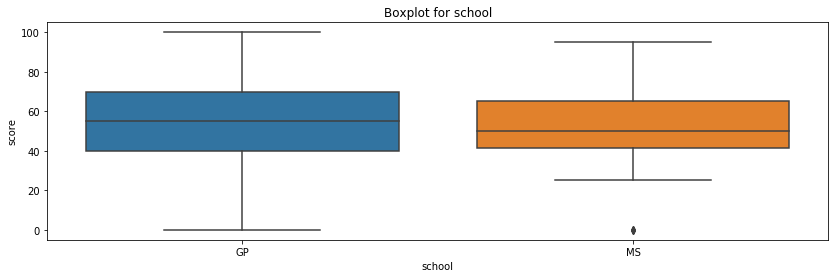

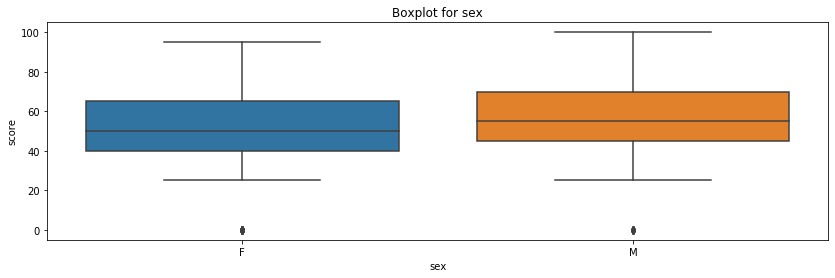

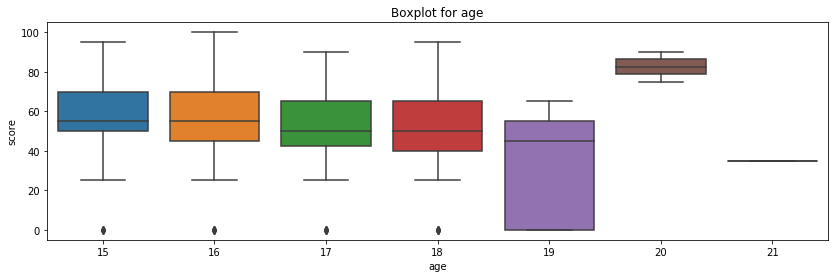

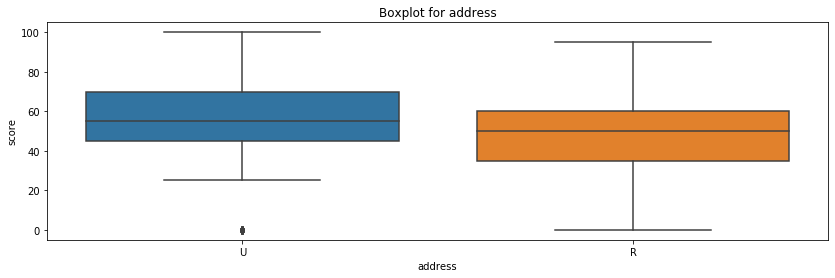

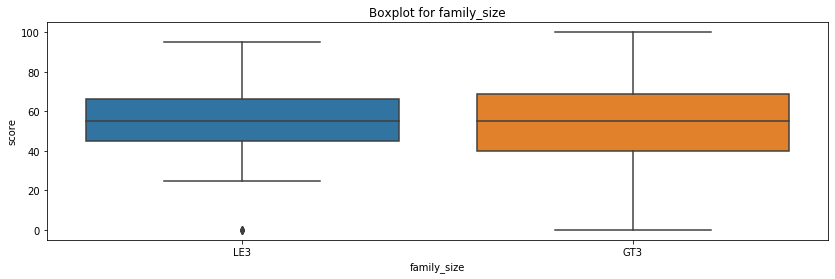

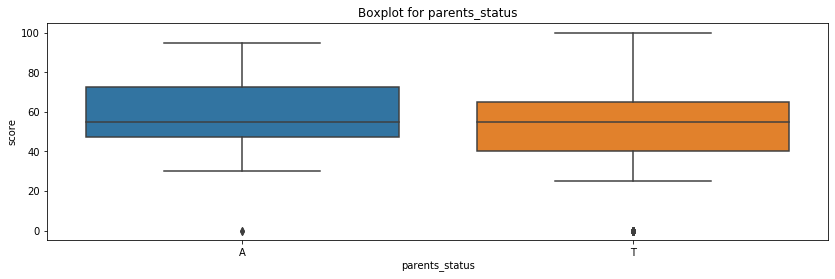

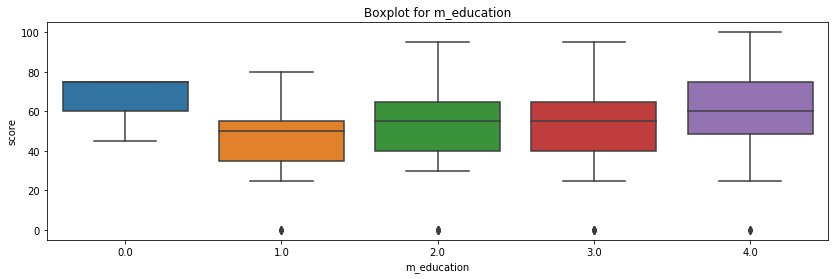

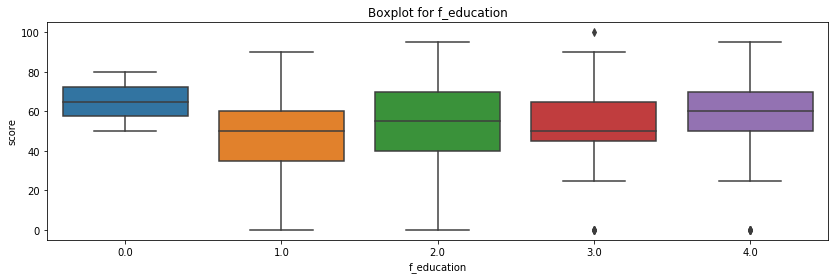

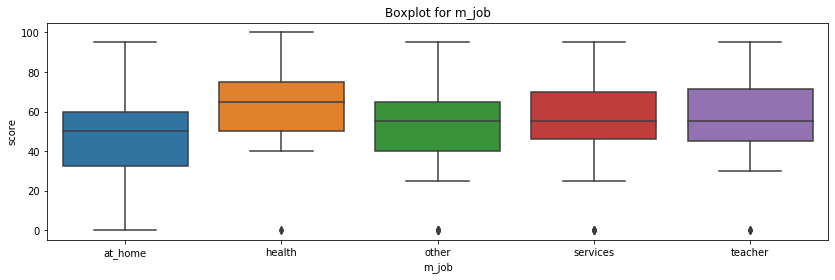

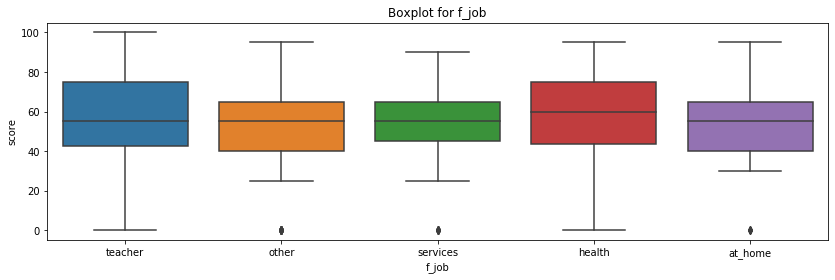

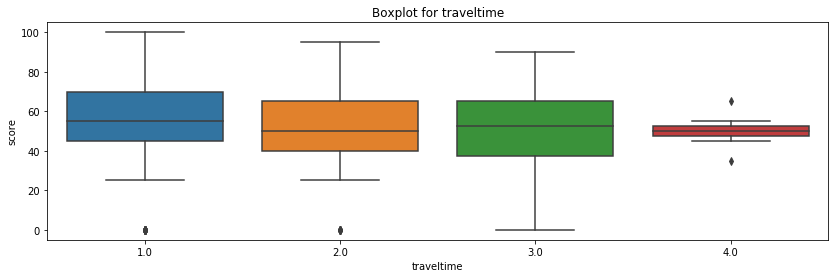

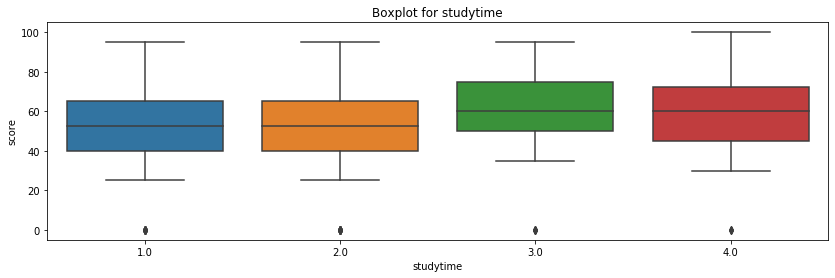

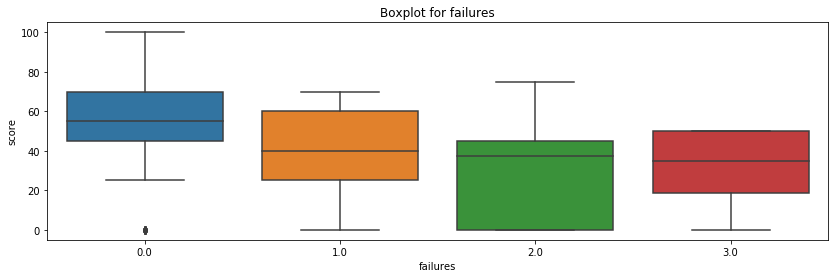

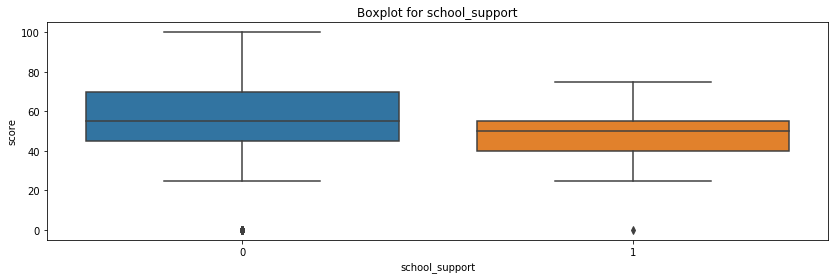

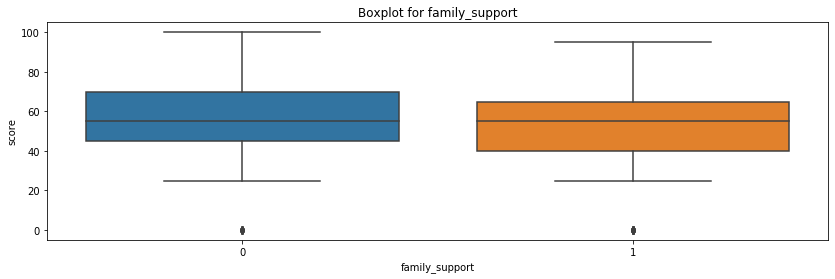

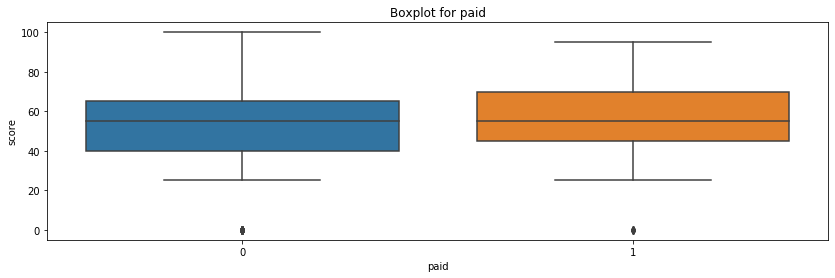

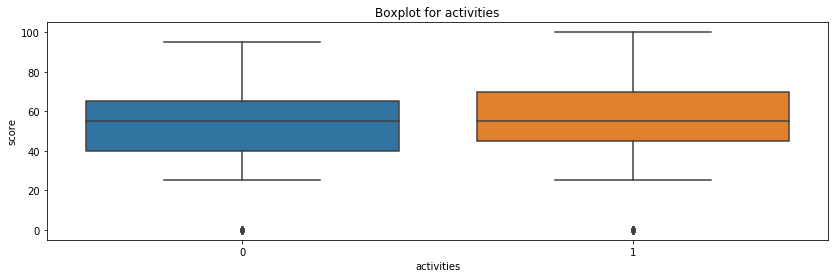

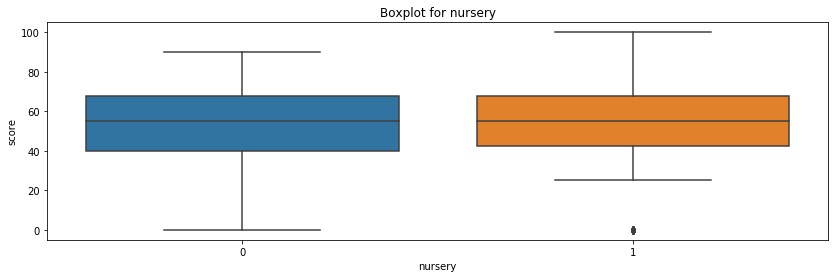

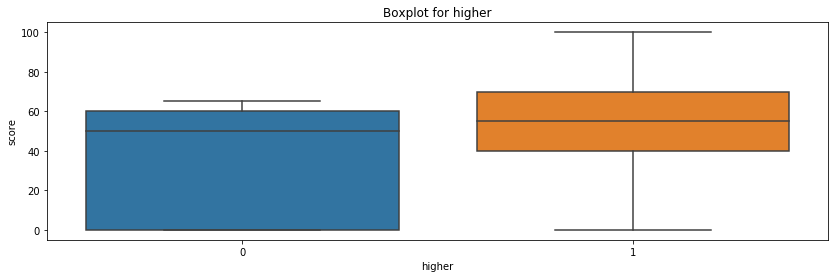

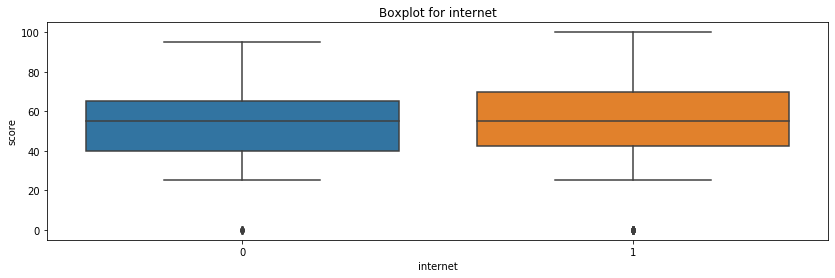

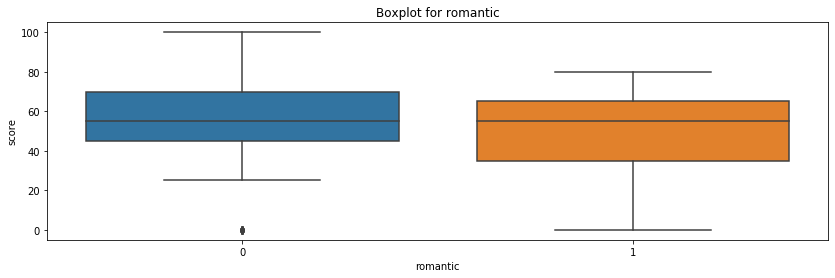

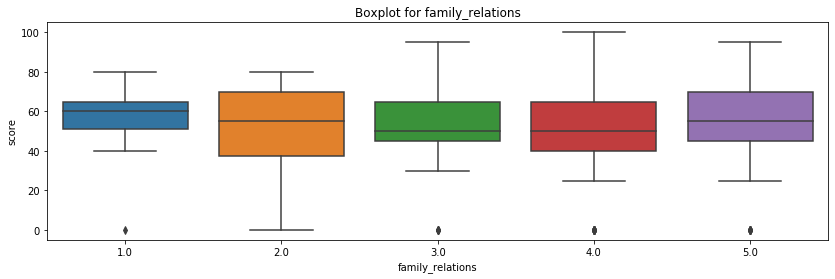

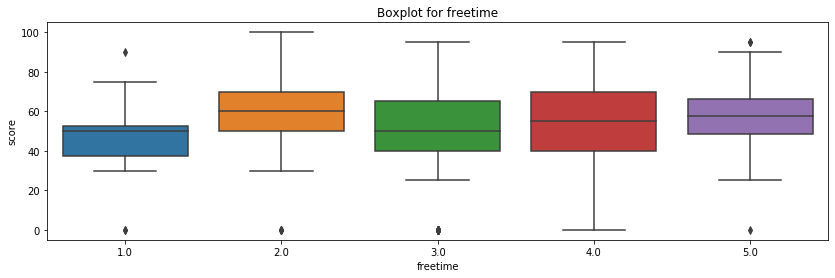

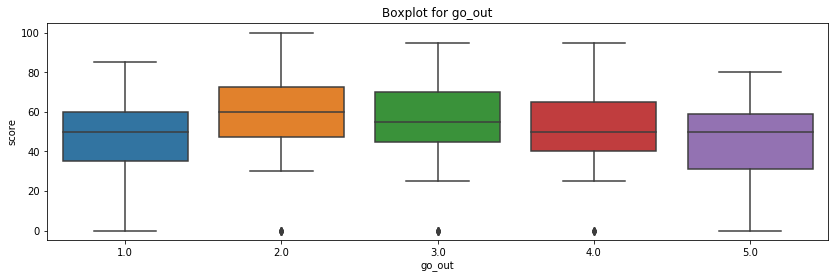

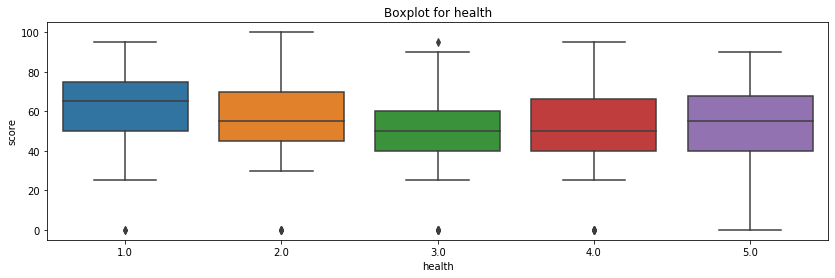

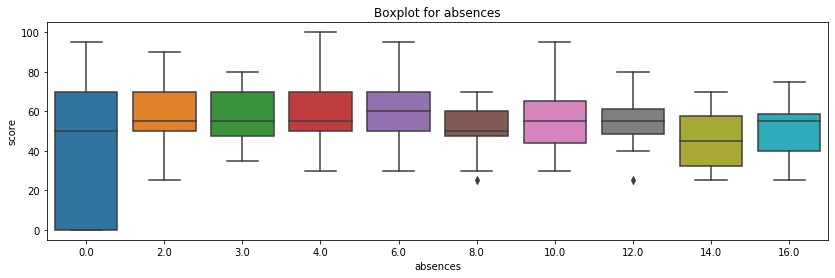

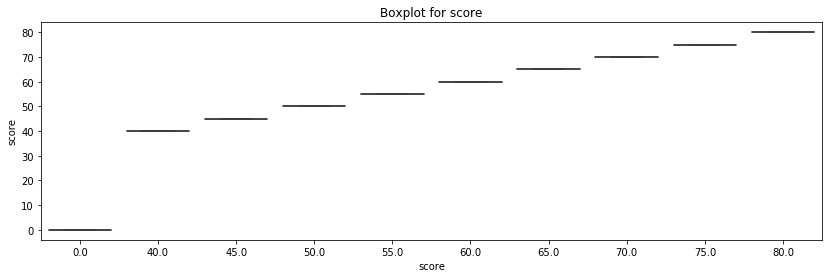

In [40]:
# проведем анализ номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in data.columns:
    get_boxplot(col)
    

In [41]:
# номинатвный анализ
    
# school: видно что результаты в среднем схожи, ученики из школы GP показывают результаты чуть лучше
# но допускаю что это связано с тем что данных по этой школе гораздо больше, чем по MS

# sex: здесь так же видно что результаты примерно равны, мальчики показывают результаты чуть лучше чем девочки

# age: здесь довольно интересная зависимость. видим что в среднем результаты примерно одинаковы. 
# (хотя есть тенденция на снижение результатов с возрастом, что странно)
# высокий результат у 20-летних обусловлен тем, что таких учеников всего 3 
# (возможно, мне следовало бы удалить их в таком случае, поскольку их количество мало, но оставив их мы увидели, 
# что их результаты впечатляют :) )

# address: здесь видим что медианное значение примерно равно для городских и сельских учеников,
# однако максимальные результаты гораздо выше у городских, для сельских учеников результаты
# выше 80 уже считаются выбросами

# family_size: результаты практически идентичны (что логично). медианное значение в больших семьях чуть ниже

# parents_status: здесь видим больший разброс вверх в семьях где родители живут отдельно.
# однако предполагаю что это связано с тем что данных по таким семьям меньше.

# m_education: как и следовало из таблицы корреляции - явно видна тенденция на рост оценок с ростом
# уровня образования матери. примечателен тот факт, что оставив значения 0 (без образования)
# мы смогли увидеть что данные ученики показали весьма неплохие результаты

# f_education: здесь ситуация аналогична образованию матери, тендценция на рост оценок с ростом уровня
# образования родителя. примечательно так же, что ученики у чьих отцов нет образования, показали так же
# весьма неплохие результаты (хоть эти данные и нельзя одназначно назвать объективными)

# m_job: здесь так же очевидна корреляция с уровнем образования матери. видим что дети учителей и врачей
# показывают результаты выше, чем остальные

# f_job: аналогичная ситуация с матерями, что только подтверждает нашу гипотезу

# traveltime: видна тендценция на снижение результатов, с ростом времени на путь до школы
# возможно она не совсем очевидна (корреляция всего -0.086) однако примечателен факт
# значительно более низких результатов у школьников с очень большими временными затратами
# (хоть этих данных и мало для объективной оценки)

# studytime: здесь так же прослеживается тенденция на рост оценок с ростом времени на учебу, однако не так очевидно
# при этом помним про весьма высокий коэффициент корреляции по данному параметру.

# failures: график подтверждает данные из таблицы корреляции - с ростом неудач, оценка снижается

# school_support: данный феномен для меня необъясним. все описано в таблице корреляции :)

# family_support: видим что различий практически нет

# paid: удивительно, но график говорит что наличие платных курсов практически никак не влияет на результат
# и в среднем результаты такие же как и у тех, кто не посещает курсы (что так же подтверждается низким
# коэффициентом корреляции)

# activities, nursery: видим что эти данные практически не оказывают влияния на переменную score

# higher: весьма примечателен факт максимальные результаты гораздо выше у тех, кто желает получать
# высшее образование

# internet: видим что максимальные результаты у учеников с доступом в интернет чуть выше, нежели у тех
# у кого он отсутсвует. хоть данные и слабо коррелируют, предлагаю добавить их в итоговую модель

# romantic: здесь так же очевидно снижение максимальных результатов у тех, кто состоит в отношениях
# (что очевидно, какая учеба когда тут любовь? :) )  хотя видим что медианная оценка примерно равна

# family_relations: здесь так же результаты подтверждают здравый смысл, что с улучшением отношений в семье
# в среднем результаты так же растут

# freetime: здесь видим что наличие свободного времени слабо влияет на конечный результат (что потверждается
# таблицей корреляции). На графике выделяются ученики с очень маленьким количеством свободного времени
# однако не следует забывать что их всего 11 в данных, да и среди них есть весьма неплохие результаты,
# которые считаются выбросами из-за их малого количества

# go_out: здесь мы видим подтверждение информации из таблицы корреляции - с ростом количества времени
# на прогулки, результаты снижаются.

# health: я предполагал что данный параметр окажет весьма сильное влияние на конечный результат, 
# однако видим, что здоровье слабо влияет на конечный результат (что так же подтверждается корреляцией)
# это не может не радовать.

# absences: график подтверждает таблицу корреляции и видим что с ростом количества пропусков наблюдается тенденция
# на снижение итоговой оценки

In [42]:
# проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, 
# которые мы для себя выделили

# для себя я выделил следующие столбцы, которые оказывают существенное влияние на конечный результат

columns = ['sex', 'age', 'address', 'm_education', 'f_education',
           'traveltime', 'studytime', 'school_support', 'higher', 'failures',
           'internet', 'romantic', 'family_relations', 'go_out', 'absences']

def get_stat_diff(column):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'], 
                        data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
for column in columns:
    get_stat_diff(column)
    

# видим что статистические значимые различия найдены в 9 колонках, 
# которые мы оставим для дальнейшего построения модели


data_model = data.loc[:, ['sex', 'age', 'address', 'm_education', 'studytime', 'school_support',
                         'go_out', 'failures', 'absences']]
data_model.head()

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_education
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки absences


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,sex,age,address,m_education,studytime,school_support,go_out,failures,absences
0,F,18,U,4.0,2.0,1,4.0,0.0,6.0
1,F,17,U,1.0,2.0,0,3.0,0.0,4.0
2,F,15,U,1.0,2.0,1,2.0,3.0,10.0
3,F,15,U,4.0,3.0,0,2.0,0.0,2.0
4,F,16,U,3.0,2.0,0,2.0,0.0,4.0


In [43]:
## Выводы:

# В данных присутствовало большое количество пропущенных значений, была произведена
# попытка заменить отсутсвующие данные наиболее релевантными и коррелирующими там, где это возможно

# Было большое количество выбросов/пропусков в столбце score, что привело к тому что эти данные
# пришлось удалить

# Высокая отрицательная корреляция параметров failures, go_out и score говорит о том, что в зоне риска
# находятся ученики с большим количеством неудач и проводящие много времени с друзьями/ на улице

# Так же ученики с большим количеством пропусков занятий рискуют получить более низкую оценку.

# Высокая положительная корреляция параметров m/f_education говорит о положительном влиянии уровня образования
# родителей на итоговую оценку.

# Так же весьма значительными факторами, влияющими на итоговую оценку является дополнительное образование вне школы
# и затраты времени на дополнительное обучение.